# SURUTHI S
# 225229141
#  Design of LSTM and GRU RNN for classification of IMDB reviews

In [ ]:
import tensorflow
import keras

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Activation,Dropout,SpatialDropout1D,Bidirectional,LSTM,SimpleRNN,GRU
from tensorflow.keras.layers import Conv1D,MaxPooling1D,GlobalAveragePooling1D,GlobalMaxPooling1D

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/imdb.csv").sample(2000).reset_index()
df

,index,review,sentiment
0,36718,The Three Stooges has always been some of the ...,positive
1,36793,I'm biased towards any movie that paints a lux...,positive
2,13533,The performances in this movie were fantastic....,positive
3,12323,How the Grinch Stole Christmas was a wonderful...,negative
4,48153,I was not old enough to really appreciate the ...,negative
...,...,...,...
1995,42088,"The success of the original French ""Emmanuelle...",negative
1996,41101,"""Secret Sunshine"" reminded me of ""The Rapture""...",positive
1997,24392,Watching this again after a gap of many years ...,positive
1998,20335,This fanciful horror flick has Vincent Price p...,negative


In [ ]:
mapping = dict(positive=1,
               negative=0)

# creating a mapping to encode the labels
df['sentiment'] = df['sentiment'].map(mapping)

df.head()

,index,review,sentiment
0,36718,The Three Stooges has always been some of the ...,1
1,36793,I'm biased towards any movie that paints a lux...,1
2,13533,The performances in this movie were fantastic....,1
3,12323,How the Grinch Stole Christmas was a wonderful...,0
4,48153,I was not old enough to really appreciate the ...,0


In [ ]:
# checking out if there is any null values in the dataset
df.isna().sum()

# no null values seems to be found

index        0
review       0
sentiment    0
dtype: int64

In [ ]:
# downloading nltk dependencies
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
all_stopwords = stopwords.words('english')
negation = ['no','not']
all_stopwords = [w for w in all_stopwords if w not in negation]

def preprocessing(data):
    corpus = []
    for i in range(len(data)):
        # remove urls
        tweet = re.sub(r'http\S+', ' ', data[i]) # links

        # remove html tags
        tweet = re.sub(r'<.*?>', ' ', tweet) # tags
        tweet = re.sub('&\w+([-.]\w+)*', ' ', tweet) # colorcodes

        # remove digits
        tweet = re.sub(r'\d+', ' ', tweet)
        tweet = re.sub('@\w+([-.]\w+)*', ' ', tweet) # mentions

        # remove emojis
        emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
        tweet = emoji_pattern.sub(r'', tweet) # no emoji

        # remove hashtags
        tweet = re.sub(r'#\w+', ' ', tweet) # hashtags
        review = re.sub('[^a-zA-Z]', ' ', tweet) # any characters other than alphabets
        review = review.lower() # casefolding
        review = review.split()
        lemma= WordNetLemmatizer() # lemmatization
        review = [lemma.lemmatize(word) for word in review if word not in all_stopwords]
        review = ' '.join(review)
        corpus.append(review)
    return corpus

In [ ]:
review = preprocessing(df['review'])

In [ ]:
y = np.array([1 if label == 'positive' else 0 for label in df['sentiment']])

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(review,y,test_size=0.40,stratify = y,random_state=42)

In [ ]:
token = Tokenizer()
token.fit_on_texts(X_train)

In [ ]:
# Convert text data to sequences of integers
train_sequences = token.texts_to_sequences(X_train)
valid_sequences = token.texts_to_sequences(X_test)

In [ ]:
vocab_size = len(token.word_index)+1
vocab_size



# there are 17342 unique words in the corpus
# we will feed this to the input_dim of embedding layer
# +1 because the index starts from 0


17342

In [ ]:
maxlen = 100 # specifies the maximum length of the sequences after padding or truncating.

X_train = np.array(pad_sequences(train_sequences, maxlen=maxlen,padding = 'post'))
X_test = np.array(pad_sequences(valid_sequences, maxlen=maxlen,padding = 'post'))


In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
X_train.shape

(1200, 100)

# LSTM

In [ ]:
vec_size = 300
lstm =Sequential()
# Embedding layer
lstm.add(Embedding(input_dim = vocab_size, output_dim = vec_size,input_length=maxlen,trainable = False))
#lstm
lstm.add(LSTM(1,dropout=0.20))
lstm.add(Dense(1,activation='sigmoid'))

In [ ]:
lstm.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
lstm_history = lstm.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
38/38 [==============================] - 3s 21ms/step - loss: 0.6337 - accuracy: 0.8967 - val_loss: 0.5466 - val_accuracy: 1.0000
Epoch 2/10
38/38 [==============================] - 0s 10ms/step - loss: 0.4844 - accuracy: 1.0000 - val_loss: 0.4191 - val_accuracy: 1.0000
Epoch 3/10
38/38 [==============================] - 0s 9ms/step - loss: 0.3979 - accuracy: 1.0000 - val_loss: 0.3608 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 0.3506 - accuracy: 1.0000 - val_loss: 0.3215 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 0s 11ms/step - loss: 0.3140 - accuracy: 1.0000 - val_loss: 0.2872 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 0s 12ms/step - loss: 0.2799 - accuracy: 1.0000 - val_loss: 0.2548 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 1s 13ms/step - loss: 0.2461 - accuracy: 1.0000 - val_loss: 0.2237 - val_accuracy: 1.0000
Epoch 8/10
38/3

In [ ]:
import matplotlib.pyplot as plt

def accuracy_plot(history):
  plt.plot(history.history['accuracy'])
  plt.title(" Accuracy ")
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.legend(['Train'],loc='best')
  plt.show()

def loss_plot(history):
  plt.plot(history.history['loss'])
  plt.title(" Loss ")
  plt.ylabel("Loss")
  plt.xlabel("Epochs")
  plt.legend(['Train'],loc='best')
  plt.show()

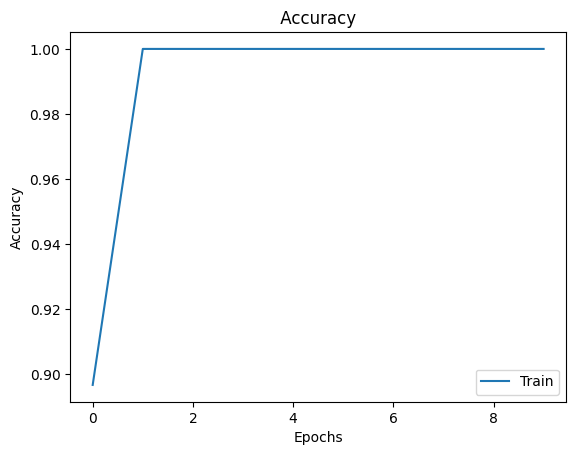

In [ ]:
accuracy_plot(lstm_history)

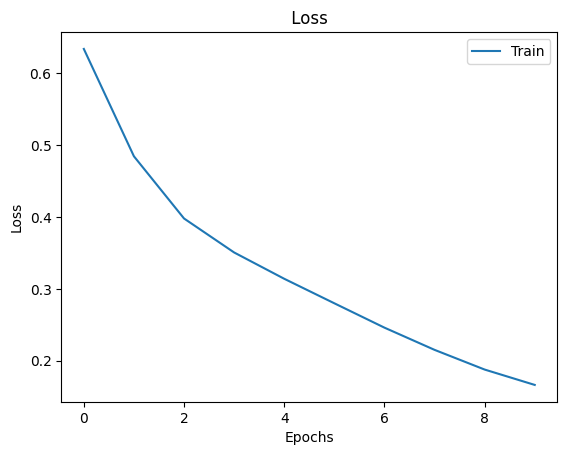

In [ ]:
loss_plot(lstm_history)

# RUN WITH DIFFERENT NUMBER OF LAYERS

Training model with 2 LSTM layers:
Epoch 1/5
38/38 [==============================] - 14s 232ms/step - loss: 0.1707 - accuracy: 0.9933 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 2/5
38/38 [==============================] - 6s 155ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 3/5
38/38 [==============================] - 6s 166ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4/5
38/38 [==============================] - 5s 138ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 8.7223e-04 - val_accuracy: 1.0000
Epoch 5/5
25/25 [==============================] - 0s 9ms/step - loss: 7.0834e-04 - accuracy: 1.0000
Test Loss: 0.0007
Test Accuracy: 1.0000


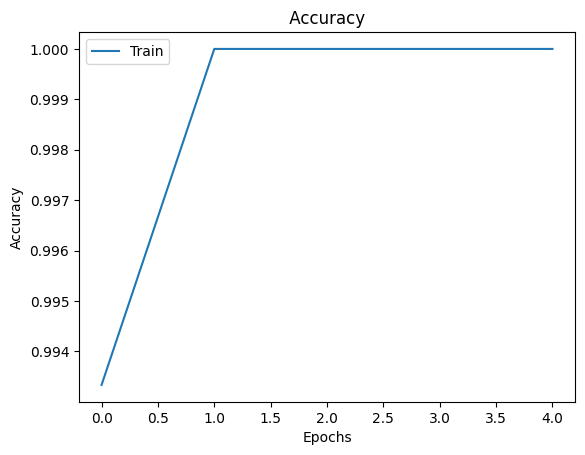

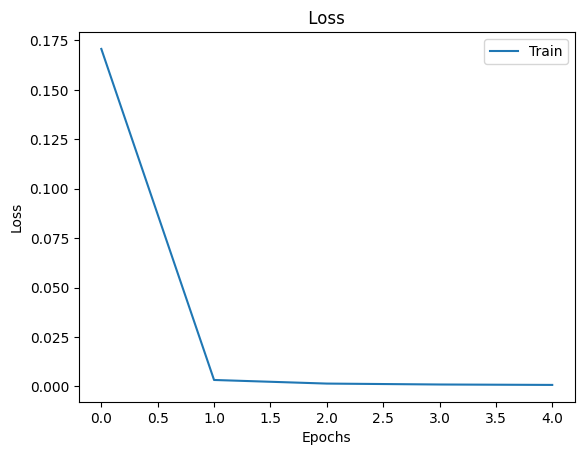


Training model with 3 LSTM layers:
Epoch 1/5
38/38 [==============================] - 16s 226ms/step - loss: 0.2111 - accuracy: 0.9833 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 2/5
38/38 [==============================] - 6s 156ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 3/5
38/38 [==============================] - 5s 139ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 4/5
38/38 [==============================] - 7s 180ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 5/5
25/25 [==============================] - 0s 8ms/step - loss: 0.0015 - accuracy: 1.0000
Test Loss: 0.0015
Test Accuracy: 1.0000


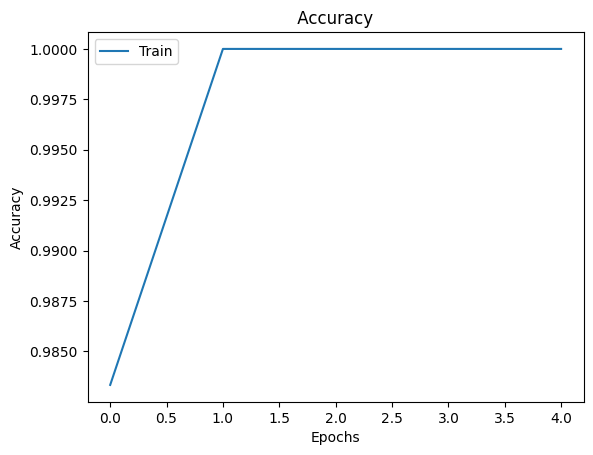

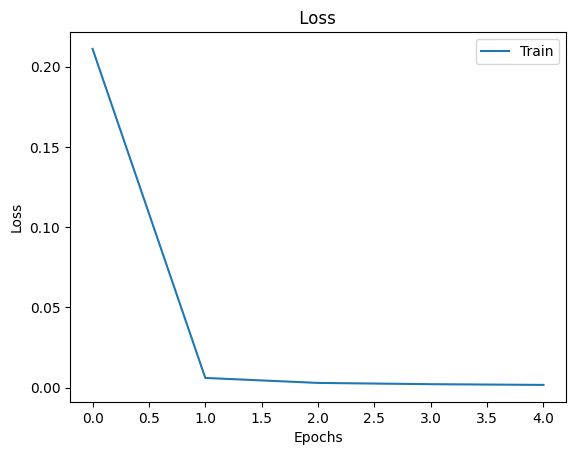


Training model with 4 LSTM layers:
Epoch 1/5
38/38 [==============================] - 19s 254ms/step - loss: 0.1887 - accuracy: 0.9875 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 2/5
38/38 [==============================] - 6s 149ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 3/5
38/38 [==============================] - 8s 207ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 4/5
38/38 [==============================] - 5s 139ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 5/5
25/25 [==============================] - 0s 13ms/step - loss: 9.9913e-04 - accuracy: 1.0000
Test Loss: 0.0010
Test Accuracy: 1.0000


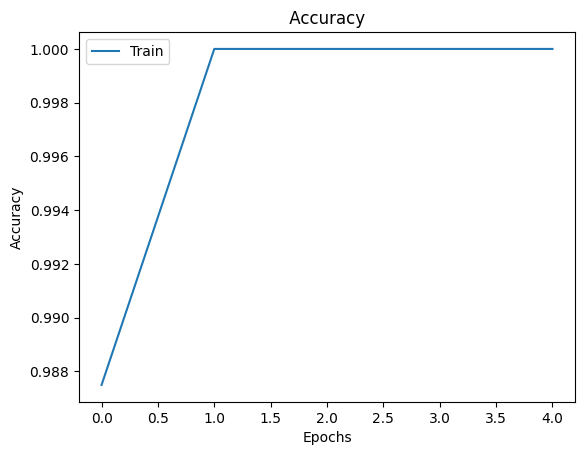

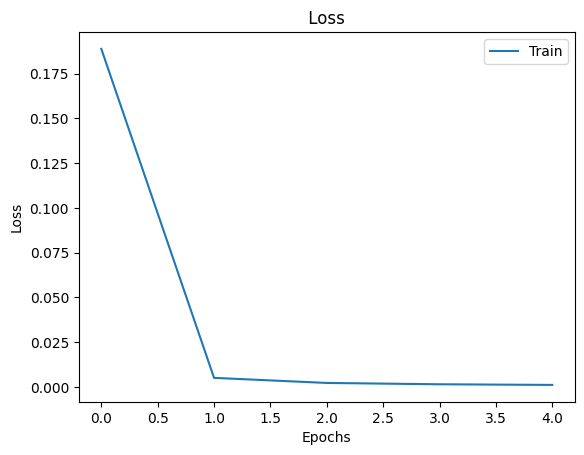

In [ ]:
for num_layers in [2, 3, 4]:
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=vec_size, input_length=maxlen))

    # Add LSTM layers
    for _ in range(num_layers):
        model.add(LSTM(units=32, return_sequences=True))  # Use return_sequences for all but the last layer

    model.add(LSTM(units=32))  # Final LSTM layer
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    print(f"Training model with {num_layers} LSTM layers:")
    history = model.fit(X_train, y_train, epochs=5,  validation_data=(X_test, y_test))

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Loss: {loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    accuracy_plot(history)
    loss_plot(history)
    print()
# This code defines a for loop that iterates through the specified numbers of LSTM layers (2, 3, and 4). For each number of layers, it creates and trains a model, then evaluates its performance.


# Bi-Directional LSTM

In [ ]:
vec_size = 200
bi_lstm =Sequential()
# Embedding layer
bi_lstm.add(Embedding(input_dim = vocab_size, output_dim = vec_size,input_length=maxlen))
#lstm
bi_lstm.add(Bidirectional(LSTM(2)))
bi_lstm.add(Dense(1,activation='sigmoid'))


In [ ]:
bi_lstm.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
bi_lstm_history = bi_lstm.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
38/38 [==============================] - 8s 217ms/step - loss: 0.5496 - accuracy: 0.9867 - val_loss: 0.4141 - val_accuracy: 1.0000
Epoch 2/5
38/38 [==============================] - 8s 210ms/step - loss: 0.3163 - accuracy: 1.0000 - val_loss: 0.2366 - val_accuracy: 1.0000
Epoch 3/5
38/38 [==============================] - 6s 165ms/step - loss: 0.1847 - accuracy: 1.0000 - val_loss: 0.1494 - val_accuracy: 1.0000
Epoch 4/5
38/38 [==============================] - 7s 169ms/step - loss: 0.1180 - accuracy: 1.0000 - val_loss: 0.1066 - val_accuracy: 1.0000
Epoch 5/5
38/38 [==============================] - 5s 137ms/step - loss: 0.0850 - accuracy: 1.0000 - val_loss: 0.0830 - val_accuracy: 1.0000


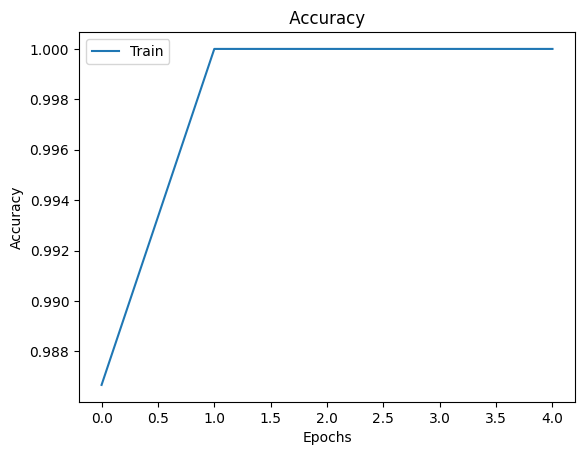

In [ ]:
accuracy_plot(bi_lstm_history)

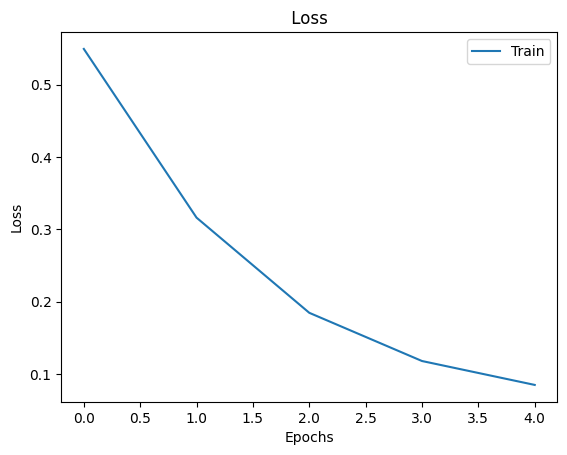

In [ ]:
loss_plot(bi_lstm_history)

# Different Seuqence Lengths

# LSTM

In [ ]:
vec_size = 100
lstm =Sequential()
# Embedding layer
lstm.add(Embedding(input_dim = vocab_size, output_dim = vec_size,input_length=maxlen))
#lstm
lstm.add(LSTM(2))
lstm.add(Dropout(0.25))
lstm.add(Dense(1,activation='sigmoid'))


In [ ]:
lstm.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
lstm_history = lstm.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
38/38 [==============================] - 10s 206ms/step - loss: 0.4836 - accuracy: 0.9858 - val_loss: 0.3225 - val_accuracy: 1.0000
Epoch 2/10
38/38 [==============================] - 6s 152ms/step - loss: 0.2868 - accuracy: 1.0000 - val_loss: 0.2179 - val_accuracy: 1.0000
Epoch 3/10
38/38 [==============================] - 6s 147ms/step - loss: 0.2209 - accuracy: 1.0000 - val_loss: 0.1689 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 5s 128ms/step - loss: 0.1931 - accuracy: 1.0000 - val_loss: 0.1383 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 3s 78ms/step - loss: 0.1739 - accuracy: 1.0000 - val_loss: 0.1178 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 4s 96ms/step - loss: 0.1464 - accuracy: 1.0000 - val_loss: 0.1029 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 3s 93ms/step - loss: 0.1381 - accuracy: 1.0000 - val_loss: 0.0917 - val_accuracy: 1.0000
Epoch 8/

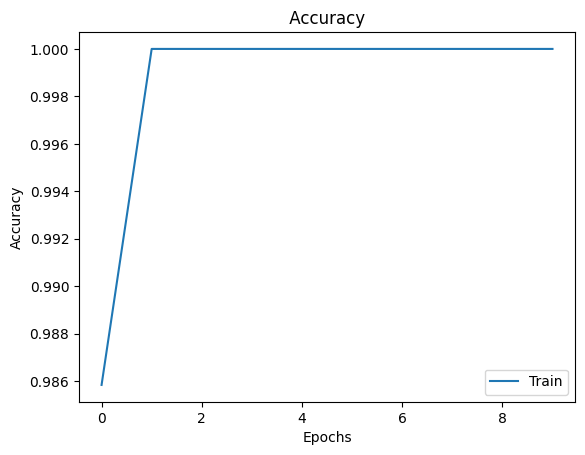

In [ ]:
accuracy_plot(lstm_history)

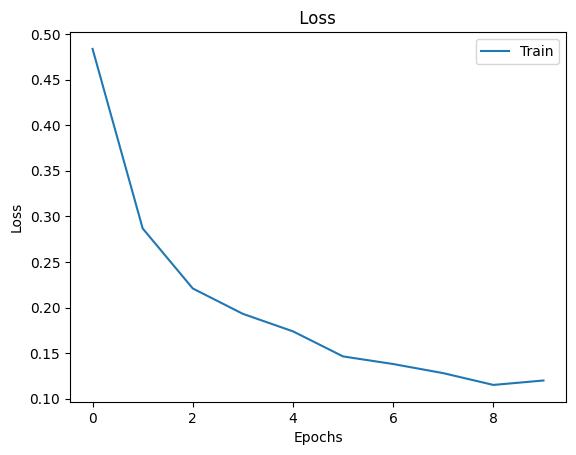

In [ ]:
loss_plot(lstm_history)

# Bi-Directional LSTM

In [ ]:
vec_size = 100
bi_lstm =Sequential()
# Embedding layer
bi_lstm.add(Embedding(input_dim = vocab_size, output_dim = vec_size,input_length=maxlen))
#lstm
bi_lstm.add(Bidirectional(LSTM(2)))
bi_lstm.add(Dropout(0.25))
bi_lstm.add(Dense(1,activation='sigmoid'))


In [ ]:
bi_lstm.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
bilstm_history = lstm.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
38/38 [==============================] - 2s 52ms/step - loss: 0.1013 - accuracy: 1.0000 - val_loss: 0.0638 - val_accuracy: 1.0000
Epoch 2/10
38/38 [==============================] - 2s 45ms/step - loss: 0.0968 - accuracy: 1.0000 - val_loss: 0.0592 - val_accuracy: 1.0000
Epoch 3/10
38/38 [==============================] - 2s 53ms/step - loss: 0.0906 - accuracy: 1.0000 - val_loss: 0.0551 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 2s 57ms/step - loss: 0.0957 - accuracy: 1.0000 - val_loss: 0.0513 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 3s 59ms/step - loss: 0.0877 - accuracy: 1.0000 - val_loss: 0.0480 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 2s 51ms/step - loss: 0.0877 - accuracy: 1.0000 - val_loss: 0.0451 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 3s 67ms/step - loss: 0.0823 - accuracy: 1.0000 - val_loss: 0.0423 - val_accuracy: 1.0000
Epoch 8/10
38

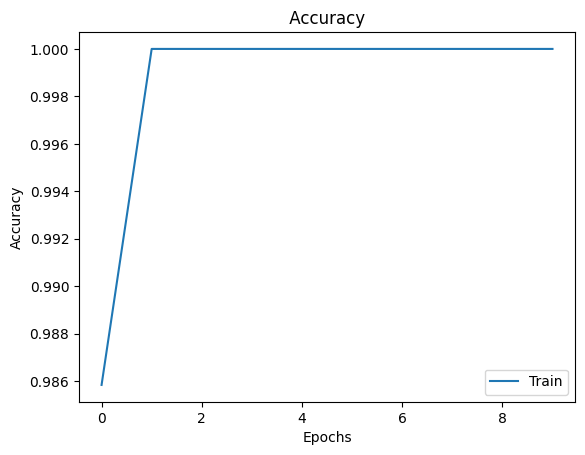

In [ ]:
accuracy_plot(bilstm_history)

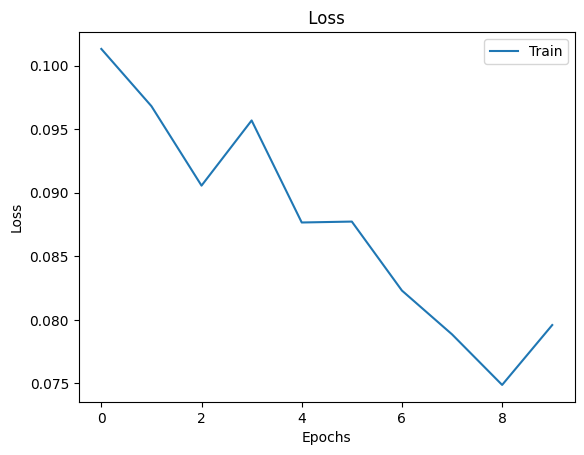

In [ ]:
loss_plot(bilstm_history)

In [ ]:
sample = '''TCS, WIPRO,HCL technologies have ramped up their hiring process and have added over 50000 people in the second quater of FY22, taking the hiring number more than one lakh 102517 in the first six months of the
fiscal year.'''

In [ ]:
def predict_sentiment(text):
    # Tokenize and pad the input text
    text_sequence = token.texts_to_sequences([text])
    text_sequence = pad_sequences(text_sequence, maxlen=100)

    # Make a prediction using the trained model
    predicted_rating = lstm.predict(text_sequence)[0]
    if np.argmax(predicted_rating) == 1:
        return 'Negative'
    else:
        return 'Positive'

In [ ]:
predicted_sentiment = predict_sentiment(sample)
print(predicted_sentiment)

1/1 [==============================] - 0s 20ms/step
Positive


# GRU

In [ ]:
vec_size = 100
gru_model =Sequential()
# Embedding layer
gru_model.add(Embedding(input_dim = vocab_size, output_dim = vec_size,input_length=maxlen))
#lstm
gru_model(10)
gru_model.add(Dense(1,activation='sigmoid'))


In [ ]:
gru_model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
gru_model_history = lstm.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
38/38 [==============================] - 1s 29ms/step - loss: 0.0667 - accuracy: 1.0000 - val_loss: 0.0335 - val_accuracy: 1.0000
Epoch 2/10
38/38 [==============================] - 2s 44ms/step - loss: 0.0672 - accuracy: 1.0000 - val_loss: 0.0318 - val_accuracy: 1.0000
Epoch 3/10
38/38 [==============================] - 2s 46ms/step - loss: 0.0672 - accuracy: 1.0000 - val_loss: 0.0300 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 2s 41ms/step - loss: 0.0606 - accuracy: 1.0000 - val_loss: 0.0285 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 4s 110ms/step - loss: 0.0584 - accuracy: 1.0000 - val_loss: 0.0270 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 2s 64ms/step - loss: 0.0577 - accuracy: 1.0000 - val_loss: 0.0257 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 1s 40ms/step - loss: 0.0567 - accuracy: 1.0000 - val_loss: 0.0244 - val_accuracy: 1.0000
Epoch 8/10
3

In [ ]:
gru_model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 100, 100)          1734200   
                                                                 
 dense_21 (Dense)            (None, 100, 1)            101       
                                                                 
Total params: 1734301 (6.62 MB)
Trainable params: 1734301 (6.62 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


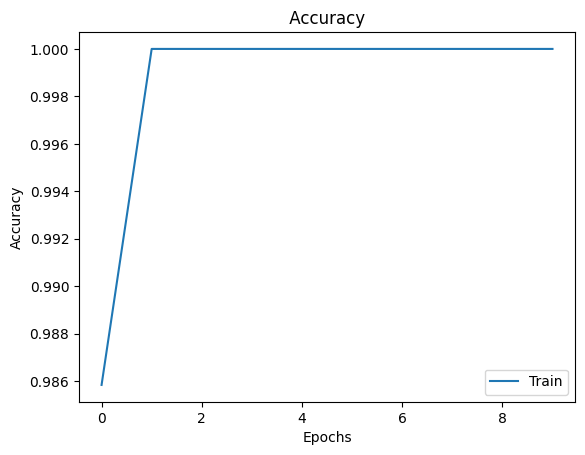

In [ ]:
accuracy_plot(gru_model_history)

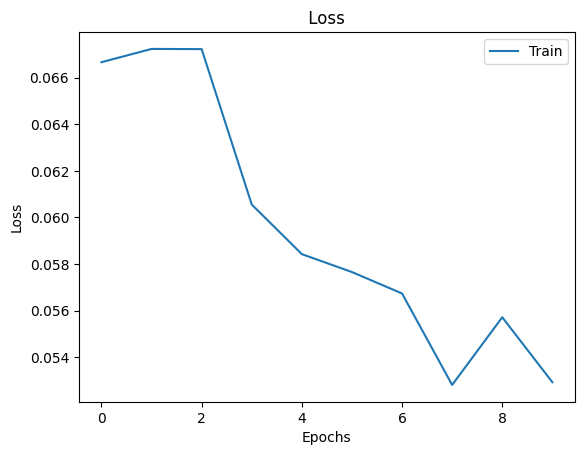

In [ ]:
loss_plot(gru_model_history)